In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread
import scipy
from dnn_app_utils import *
from sklearn.model_selection import train_test_split


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2


In [ ]:
x, y = load_data()

973it [01:12, 13.40it/s]
1453it [02:09, 11.72it/s]

In [3]:
x_entropy, y_entropy = apply_entropy(x, y, bias=0)

In [4]:
train_x, test_x, train_y, test_y =  train_test_split(x_entropy, y_entropy, test_size=0.33, random_state=84)

In [5]:
tr = np.array(train_y)
ts = np.array(test_y)

print("Number of PIZZAS in training: {}".format(len(np.where(tr == 1)[0])))
print("Number of NON-PIZZAS in training: {}".format(len(np.where(tr == 0)[0])))

print("Number of PIZZAS in test: {}".format(len(np.where(ts == 1)[0])))
print("Number of NON-PIZZAS in test: {}".format(len(np.where(ts == 0)[0])))

Number of PIZZAS in training: 1824
Number of NON-PIZZAS in training: 1034
Number of PIZZAS in test: 915
Number of NON-PIZZAS in test: 493


In [6]:
train_x_orig = np.array(train_x)
test_x_orig = np.array(test_x)
train_y = np.array([train_y])
test_y = np.array([test_y])

In [7]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

In [8]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten
test_x = test_x_flatten

In [9]:
layers_dims = [12288, 20, 20, 20, 15, 10, 7, 5, 1] #  8-layer model

Cost after epoch 5: 0.030080
---------------------------------------
Cost after epoch 10: 0.024552
---------------------------------------
Cost after epoch 15: 0.021829
---------------------------------------
Cost after epoch 20: 0.020930
---------------------------------------
Cost after epoch 25: 0.019798
---------------------------------------
Cost after epoch 30: 0.020541
---------------------------------------
Cost after epoch 35: 0.020449
---------------------------------------
Cost after epoch 40: 0.018759
---------------------------------------
Cost after epoch 45: 0.018566
---------------------------------------
Cost after epoch 50: 0.018280
---------------------------------------
Cost after epoch 55: 0.018438
---------------------------------------
Cost after epoch 60: 0.017787
---------------------------------------
Cost after epoch 65: 0.018272
---------------------------------------
Cost after epoch 70: 0.017358
---------------------------------------
Cost after epoch 75: 

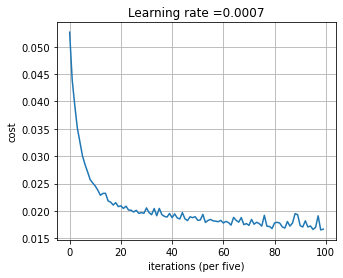

In [11]:
parameters = L_layer_model(train_x, train_y, layers_dims, test_x, test_y, lambd = 0.4, num_epochs=100, print_cost = True)

In [ ]:
pred_train, acc = predict(train_x, train_y, parameters)
print("Acc: ", acc)

In [ ]:
pred_test, acc = predict(test_x, test_y, parameters)
print("Acc: ", acc)

In [ ]:
analysis = false_and_positives_analysis(pred_test, test_y)